# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Importing API key.
from api_keys import weather_api_key

# Incorporating citipy to determine city based on latitude and longitude.
from citipy import citipy

# Outputing File (CSV).
output_data_file = "/Users/azpunit/Desktop/python-api-challenge/output_data/cities.csv"

# Ranging of latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# Listing for holding lat_lngs and cities.
lat_lngs = []
cities = []

# Creating a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identifying nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list.
    if city not in cities:
        cities.append(city)

# Printing the city count to confirm sufficient count.
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Saving api_keys information and query. 
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_unit = "imperial"

query_url = f"{url}appid={weather_api_key}&units={temp_unit}&q="

# Printing the first part of our data retreival.
print("Beginning Data Retrieval")
print("-----------------------------")

# Preparing lists for holding our response.
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind = []
dt = []
sys = []
name = []

# Looping through the cities and perform an API request on each of them. 
series = 0
set = 1
for city in cities:
    series = series+1
    if series == 50:
        series = 0
        set = set+1  
    response = requests.get(query_url + city).json()    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        dt.append(response['dt'])
        sys.append(response['sys']['country'])
        name.append(response['name'])
        print(f"Processing Record {series} of Set {set} | {city}")
    
    except KeyError:
        print("City not found. Skipping...")

# Printing the last part of our data retreival.
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 2 of Set 1 | ladario
Processing Record 3 of Set 1 | ambulu
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | san quintin
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | presidencia roque saenz pena
Processing Record 9 of Set 1 | jalu
Processing Record 10 of Set 1 | novikovo
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | tecoanapa
Processing Record 13 of Set 1 | betioky
Processing Record 14 of Set 1 | waipawa
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | taltal
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | lucea
Processing Record 24 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Creating a dataframe and counting its cells for each column.
raw_city_dataframe = pd.DataFrame({"City": name,
                                   "Lat": lat,
                                   "Lng": lng,
                                   "Max Temp": temp_max,
                                   "Humidity": humidity,
                                   "Cloudiness": clouds,
                                   "Wind Speed": wind,
                                   "Country": sys,
                                   "Date": dt
                                  })

raw_city_dataframe.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [12]:
# Displaying the head of the columns of the Dataframe previously created.
raw_city_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ladário,-19.00,-57.60,86.00,40,90,2.24,BR,1595626238
1,Ambulu,-8.35,113.61,68.77,86,97,3.06,ID,1595626238
2,Ushuaia,-54.80,-68.30,32.00,94,90,16.11,AR,1595626232
3,San Quintín,30.48,-115.95,70.61,63,0,11.41,MX,1595626238
4,Pevek,69.70,170.31,46.24,68,94,8.72,RU,1595626238


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Using the function "describe" on several column of our previous DataFrame to see what is the maximum humidity.
intermediary_city_dataframe = raw_city_dataframe[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]]
intermediary_city_dataframe.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,18.092934,19.461753,68.432809,70.153846,48.177102,7.704508,1.595626e+09
std,33.619964,89.661980,14.106849,19.582871,37.856015,5.065635,7.336705e+01
min,-54.800000,-175.200000,32.000000,8.000000,0.000000,0.090000,1.595626e+09
25%,-10.535000,-59.835000,57.000000,57.000000,6.000000,3.570000,1.595626e+09
50%,19.250000,25.570000,70.610000,76.000000,42.000000,6.870000,1.595626e+09
75%,47.420000,98.695000,79.080000,85.000000,87.000000,10.490000,1.595626e+09
max,77.480000,179.320000,104.990000,100.000000,100.000000,28.970000,1.595626e+09


In [18]:
# Getting the indices of cities that have humidity over 100%.
intermediary_city_dataframe_2 = raw_city_dataframe.loc[raw_city_dataframe["Humidity"] > 100]
intermediary_city_dataframe_2["Humidity"].index

Int64Index([], dtype='int64')

In [22]:
# Making a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_city_dataframe.drop(raw_city_dataframe[raw_city_dataframe["Humidity"] > 100].index, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ladário,-19.00,-57.60,86.00,40,90,2.24,BR,1595626238
1,Ambulu,-8.35,113.61,68.77,86,97,3.06,ID,1595626238
2,Ushuaia,-54.80,-68.30,32.00,94,90,16.11,AR,1595626232
3,San Quintín,30.48,-115.95,70.61,63,0,11.41,MX,1595626238
4,Pevek,69.70,170.31,46.24,68,94,8.72,RU,1595626238


In [30]:
# Extracting relevant fields from the data frame.
raw_formatter = raw_city_dataframe[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
intermediary_formatter = raw_formatter.reset_index()
final_formatter = intermediary_formatter.rename(columns={"index": "City_ID"})
final_city_dataframe = final_formatter.set_index("City_ID")

# Exporting the City_Data into a csv.
final_city_dataframe.to_csv("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/City_Data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

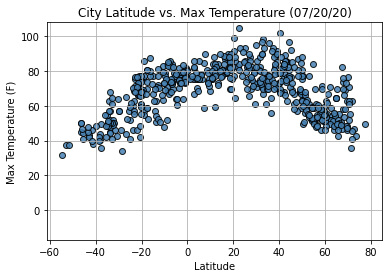

In [244]:
# Drawing a scatter plot of the city latitude vs the maximum temperature.
plt.grid(True)
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color="steelblue", alpha=0.85, edgecolors="black")

plt.title("City Latitude vs. Max Temperature (07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.ylim(-17, 108)
plt.xlim(-61.2, 84.8)

plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig1.png")
plt.show()

In [ ]:
# This scatter plot above shows the relationship between the city latitude and the max temperature. 
# We can say that the max temperature is at its highest for the latitudes between 20 and 40.

## Latitude vs. Humidity Plot

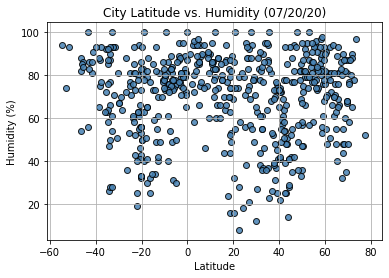

In [245]:
# Drawing a scatter plot of the city latitude vs the humidity.
plt.grid(True)
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color="steelblue", alpha=0.85, edgecolors="black")

plt.title("City Latitude vs. Humidity (07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-61.2, 84.8)

plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig2.png")
plt.show()

In [ ]:
# This scatter plot above shows the relationship between the city latitude and the humidity. 
# We can say that the max humidity is of 100 percent and the lowest humidity, which is of approximately 5 percent, is located at latitude 22.

## Latitude vs. Cloudiness Plot

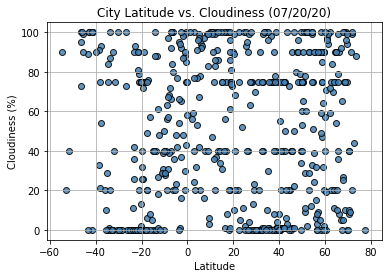

In [246]:
# Drawing a scatter plot of the city latitude vs the cloudiness.
plt.grid(True)
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color="steelblue", alpha=0.85, edgecolors="black")

plt.title("City Latitude vs. Cloudiness (07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(-61.2, 84.8)

plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig3.png")
plt.show()

In [ ]:
# This scatter plot above shows the relationship between the city latitude and the cloudiness. 
# We can say that the cloudiness is quite equally spread between latitutes going from -43 to 70, going from 0 to 100 percent.

## Latitude vs. Wind Speed Plot

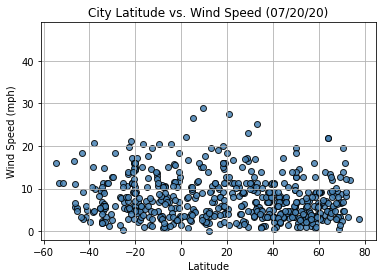

In [247]:
# Drawing a scatter plot of the city latitude vs the wind speed.
plt.grid(True)
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color="steelblue", alpha=0.85, edgecolors="black")

plt.title("City Latitude vs. Wind Speed (07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.ylim(-2, 49)
plt.xlim(-61.2, 84.8)

plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig4.png")
plt.show()

In [248]:
# This scatter plot above shows the relationship between the city latitude and the wind speed. 
# No matter what is the latitude, most values of the wind speed are comprised between 0 and 15 mph. 

## Linear Regression

In [249]:
# OPTIONAL: Creating a function to create Linear Regression plots.
def northern_regression_plots(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_equation = x * slope + intercept
    regression_equation_plot = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression_equation, "r-")
    plt.annotate(regression_equation_plot, (20, 40), fontsize=15, color="red")
    print(f"The r-squared is: {rvalue**2}")

def southern_regression_plots(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_equation = x * slope + intercept
    regression_equation_plot = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression_equation, "r-")
    plt.annotate(regression_equation_plot, (-50, 20), fontsize=15, color="red")
    print(f"The r-squared is: {rvalue**2}")

In [250]:
# Creating Northern and Southern Hemisphere DataFrames.
columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]

northern_hemisphere_dataframe = clean_city_data.loc[clean_city_data["Lat"] >= 0, columns]
southern_hemisphere_dataframe = clean_city_data.loc[clean_city_data["Lat"] < 0, columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42557084712684906


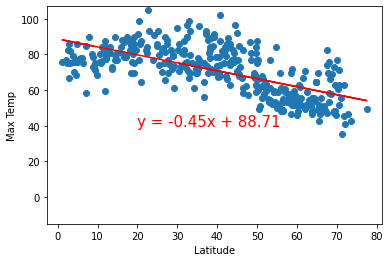

In [251]:
# Drawing a scatter plot with a regression line of the city latitude vs the maximum temperature in the northern hemisphere.
northern_latitude = northern_hemisphere_dataframe["Lat"]
northern_max_temp = northern_hemisphere_dataframe["Max Temp"]

plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.ylim(-15, 107)

northern_regression_plots(northern_latitude, northern_max_temp)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6126384300609032


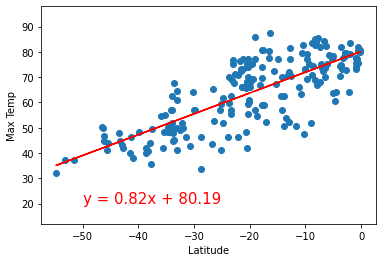

In [252]:
# Drawing a scatter plot with a regression line of the city latitude vs the maximum temperature in the southern hemisphere.
southern_latitude = southern_hemisphere_dataframe["Lat"]
southern_max_temp = southern_hemisphere_dataframe["Max Temp"]

plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.ylim(12, 98)

southern_regression_plots(southern_latitude, southern_max_temp)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig6.png")

In [253]:
# For my part, those scatter plots depicting the maximum temperature in function of the latitude for both the northern and the southern
# hemisphere really tell us that the maximum temperature reaches it's highest values as we get closer to latitude 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010011337362503243


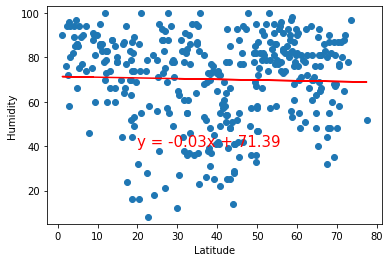

In [254]:
# Drawing a scatter plot with a regression line of the city latitude vs the humidity in the northern hemisphere.
northern_latitude = northern_hemisphere_dataframe["Lat"]
northern_humidity = northern_hemisphere_dataframe["Humidity"]

plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.ylim(5, 103)

northern_regression_plots(northern_latitude, northern_humidity)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001105438472665923


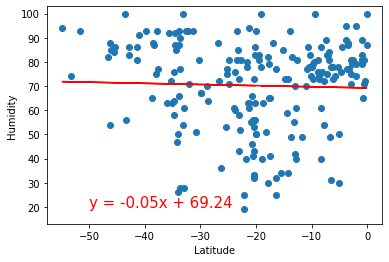

In [255]:
# Drawing a scatter plot with a regression line of the city latitude vs the humidity in the southern hemisphere.
southern_latitude = southern_hemisphere_dataframe["Lat"]
southern_humidity = southern_hemisphere_dataframe["Humidity"]

plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.ylim(13, 103)

southern_regression_plots(southern_latitude, southern_humidity)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig8.png")

In [256]:
# Those scatter plots depicting the humidity in function of the latitude for both the northern and the southern
# hemisphere tell us that the humidity very slightly decreases as the latitude increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006171606516105191


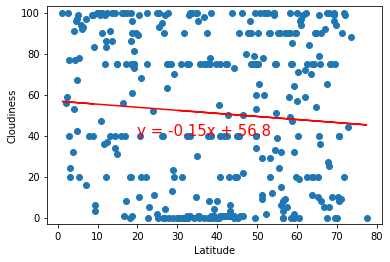

In [257]:
# Drawing a scatter plot with a regression line of the city latitude vs the cloudiness in the northern hemisphere.
northern_latitude = northern_hemisphere_dataframe["Lat"]
northern_cloudiness = northern_hemisphere_dataframe["Cloudiness"]

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.ylim(-3, 103)

northern_regression_plots(northern_latitude, northern_cloudiness)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009528690100169365


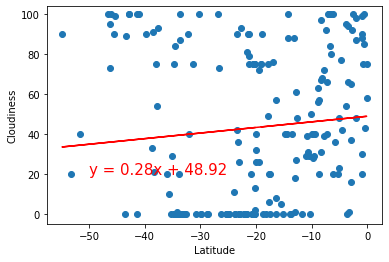

In [258]:
# Drawing a scatter plot with a regression line of the city latitude vs the cloudiness in the southern hemisphere.
southern_latitude = southern_hemisphere_dataframe["Lat"]
southern_cloudiness = southern_hemisphere_dataframe["Cloudiness"]

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.ylim(-5, 104)

southern_regression_plots(southern_latitude, southern_cloudiness)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig10.png")

In [259]:
# Those scatter plots depicting the cloudiness in function of the latitude for both the northern and the southern
# hemisphere tell us that the cloudiness very slightly increases as we get closer to latitude 0. 
# We can also say, given the particular shape of our plot, that most of the cloudiness highest values are concentrated around the latitude 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02499515426837141


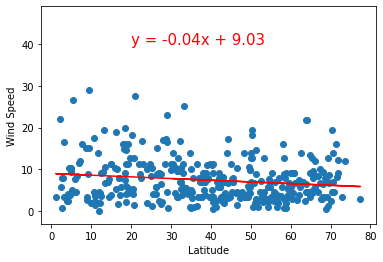

In [260]:
# Drawing a scatter plot with a regression line of the city latitude vs the wind speed in the northern hemisphere.
northern_latitude = northern_hemisphere_dataframe["Lat"]
northern_wind_speed = northern_hemisphere_dataframe["Wind Speed"]

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.ylim(-3, 49)

northern_regression_plots(northern_latitude, northern_wind_speed)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0014184979736562141


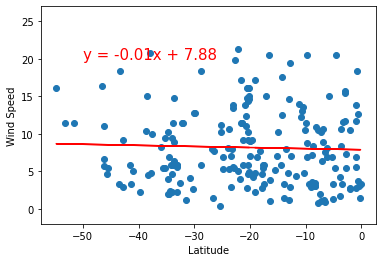

In [261]:
# Drawing a scatter plot with a regression line of the city latitude vs the wind speed in the southern hemisphere.
southern_latitude = southern_hemisphere_dataframe["Lat"]
southern_wind_speed = southern_hemisphere_dataframe["Wind Speed"]

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.ylim(-2, 27)

southern_regression_plots(southern_latitude, southern_wind_speed)
plt.savefig("/Users/azpunit/Desktop/python-api-challenge/WeatherPy/final_output_data/Fig12.png")

In [262]:
# Those scatter plots depicting the wind speed in function of the latitude for both the northern and the southern
# hemisphere tell us that the wind speed very slightly decreases as the latitude increases.